In [19]:
import ijson
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
filename = "history.json"
with open(filename, 'r') as f:
    data = ijson.items(f,"")
    data = list(data)[0]
    # print(data)
    df = pd.DataFrame(data)

In [4]:
list(df.columns)

['accountId',
 'firstBlood_rate_3',
 'firstTower_rate_3',
 'firstInhibitor_rate_3',
 'win_rate_3',
 'kda_max_3',
 'kda_min_3',
 'kda_avg_3',
 'goldPerMin_max_3',
 'goldPerMin_min_3',
 'goldPerMin_avg_3',
 'dmgPerGold_max_3',
 'dmgPerGold_min_3',
 'dmgPerGold_avg_3',
 'healPerGold_max_3',
 'healPerGold_min_3',
 'healPerGold_avg_3',
 'ccPerMin_max_3',
 'ccPerMin_min_3',
 'ccPerMin_avg_3',
 'dmgTurretPerMin_max_3',
 'dmgTurretPerMin_min_3',
 'dmgTurretPerMin_avg_3',
 'dmgObjPerMin_max_3',
 'dmgObjPerMin_min_3',
 'dmgObjPerMin_avg_3',
 'visionPerMin_max_3',
 'visionPerMin_min_3',
 'visionPerMin_avg_3',
 'champLevelPerMin_max_3',
 'champLevelPerMin_min_3',
 'champLevelPerMin_avg_3',
 'winStreak_3',
 'loseStreak_3',
 'firstBlood_rate_5',
 'firstTower_rate_5',
 'firstInhibitor_rate_5',
 'win_rate_5',
 'kda_max_5',
 'kda_min_5',
 'kda_avg_5',
 'goldPerMin_max_5',
 'goldPerMin_min_5',
 'goldPerMin_avg_5',
 'dmgPerGold_max_5',
 'dmgPerGold_min_5',
 'dmgPerGold_avg_5',
 'healPerGold_max_5',
 'hea

In [5]:
df.head()

,accountId,firstBlood_rate_3,firstTower_rate_3,firstInhibitor_rate_3,win_rate_3,kda_max_3,kda_min_3,kda_avg_3,goldPerMin_max_3,goldPerMin_min_3,...,visionPerMin_min_10,visionPerMin_avg_10,champLevelPerMin_max_10,champLevelPerMin_min_10,champLevelPerMin_avg_10,winStreak_10,loseStreak_10,gameId,teamId,win
0,uaxAlmDCLK41lfM8Qhjy1sS0c4pfM7C5JVNfgY8GCy8mqg,0,0,0,0,2.5,2.5,2.5,346.3869463869464,346.3869463869464,...,0.6993006993006993,0.6993006993006993,0.46620046620046623,0.46620046620046623,0.46620046620046623,0,-1,3338305642,Blue,True
1,lpUFO9yyySE1fAedLmuNSl5gz1Xm18p-mbhgox5La9lttP4,0,0,0,1,2.6666666666666665,2.6666666666666665,2.6666666666666665,495.6643356643357,495.6643356643357,...,0.4195804195804196,0.4195804195804196,0.6060606060606061,0.6060606060606061,0.6060606060606061,1,0,3338305642,Blue,True
2,TnF94NWhFULb75QRufV3HSHWlSVBNv-44eKJNcMh07qztQ,0,0,0,1,1.6,1.6,1.6,433.8641425389755,433.8641425389755,...,0.5679287305122495,0.5679287305122495,0.5679287305122495,0.5679287305122495,0.5679287305122495,1,0,3338305642,Blue,True
3,8Xt4odgulZzzVUT5S9H0GKVIBwMbPaq-eT-AUdULela6xg...,0,0,0,0,0,0,0,214.410480349345,214.410480349345,...,0.08733624454148473,0.08733624454148473,0.5240174672489083,0.5240174672489083,0.5240174672489083,0,-1,3338305642,Blue,True
4,5il-WTF-FEiUMVSrN0E8nibZrvFQ_MOrWGonMoBexfsHfp...,0,0,0,0,1.6666666666666667,1.5,1.5740740740740742,302.94685990338166,222.05128205128207,...,0.6280193236714976,0.7342876961908651,0.48309178743961356,0.4066877541798464,0.4423927228023668,0,-4,3338305642,Blue,True


## Player Level Analysis

In [50]:
dropColumns = ["accountId","teamId","gameId"]
data = df.drop(columns=dropColumns)
data.head()

,firstBlood_rate_3,firstTower_rate_3,firstInhibitor_rate_3,win_rate_3,kda_max_3,kda_min_3,kda_avg_3,goldPerMin_max_3,goldPerMin_min_3,goldPerMin_avg_3,...,dmgObjPerMin_avg_10,visionPerMin_max_10,visionPerMin_min_10,visionPerMin_avg_10,champLevelPerMin_max_10,champLevelPerMin_min_10,champLevelPerMin_avg_10,winStreak_10,loseStreak_10,win
0,0,0,0,0,2.5,2.5,2.5,346.3869463869464,346.3869463869464,346.3869463869464,...,42.0979020979021,0.6993006993006993,0.6993006993006993,0.6993006993006993,0.46620046620046623,0.46620046620046623,0.46620046620046623,0,-1,True
1,0,0,0,1,2.6666666666666665,2.6666666666666665,2.6666666666666665,495.6643356643357,495.6643356643357,495.6643356643357,...,463.54312354312356,0.4195804195804196,0.4195804195804196,0.4195804195804196,0.6060606060606061,0.6060606060606061,0.6060606060606061,1,0,True
2,0,0,0,1,1.6,1.6,1.6,433.8641425389755,433.8641425389755,433.8641425389755,...,221.15812917594656,0.5679287305122495,0.5679287305122495,0.5679287305122495,0.5679287305122495,0.5679287305122495,0.5679287305122495,1,0,True
3,0,0,0,0,0,0,0,214.410480349345,214.410480349345,214.410480349345,...,0,0.08733624454148473,0.08733624454148473,0.08733624454148473,0.5240174672489083,0.5240174672489083,0.5240174672489083,0,-1,True
4,0,0,0,0,1.6666666666666667,1.5,1.5740740740740742,302.94685990338166,222.05128205128207,272.2881289570223,...,226.9066967530407,1.0256410256410258,0.6280193236714976,0.7342876961908651,0.48309178743961356,0.4066877541798464,0.4423927228023668,0,-4,True


In [11]:
X = data.loc[:, data.columns != "win"]
y = data.loc[:, "win"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# benchmark models
lr = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

# 0.5026712906551691
print('Logistic Regression - Train', lr.score(X_train_scaled, y_train))
print('Logistic Regression - Test', lr.score(X_test_scaled, y_test))
print(classification_report(y_test, lr.predict(X_test_scaled)))

# 0.5027650201518418
print('Decision Tree - Train', dt.score(X_train_scaled, y_train))
print('Decision Tree - Test', dt.score(X_test_scaled, y_test))
print(classification_report(y_test, dt.predict(X_test_scaled)))

Logistic Regression - Train 0.5272609759475555
Logistic Regression - Test 0.5026712906551691
              precision    recall  f1-score   support

       False       0.51      0.49      0.50      5373
        True       0.50      0.52      0.51      5296

    accuracy                           0.50     10669
   macro avg       0.50      0.50      0.50     10669
weighted avg       0.50      0.50      0.50     10669

Decision Tree - Train 0.5232445408799224
Decision Tree - Test 0.5027650201518418
              precision    recall  f1-score   support

       False       0.50      0.79      0.62      5373
        True       0.50      0.21      0.29      5296

    accuracy                           0.50     10669
   macro avg       0.50      0.50      0.46     10669
weighted avg       0.50      0.50      0.46     10669



### Try Standard Scaler

In [15]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# benchmark models
lr = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

# 0.5054831755553473
print('Logistic Regression - Train', lr.score(X_train_scaled, y_train))
print('Logistic Regression - Test', lr.score(X_test_scaled, y_test))
print(classification_report(y_test, lr.predict(X_test_scaled)))

# 0.5027650201518418
print('Decision Tree - Train', dt.score(X_train_scaled, y_train))
print('Decision Tree - Test', dt.score(X_test_scaled, y_test))
print(classification_report(y_test, dt.predict(X_test_scaled)))

Logistic Regression - Train 0.5322468953418587
Logistic Regression - Test 0.5054831755553473
              precision    recall  f1-score   support

       False       0.51      0.49      0.50      5373
        True       0.50      0.52      0.51      5296

    accuracy                           0.51     10669
   macro avg       0.51      0.51      0.51     10669
weighted avg       0.51      0.51      0.51     10669

Decision Tree - Train 0.5232445408799224
Decision Tree - Test 0.5027650201518418
              precision    recall  f1-score   support

       False       0.50      0.79      0.62      5373
        True       0.50      0.21      0.29      5296

    accuracy                           0.50     10669
   macro avg       0.50      0.50      0.46     10669
weighted avg       0.50      0.50      0.46     10669



### PCA

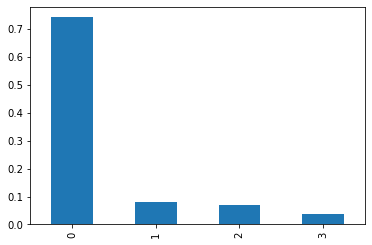

In [26]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X)
pd.Series(pca.explained_variance_ratio_).plot(kind='bar');

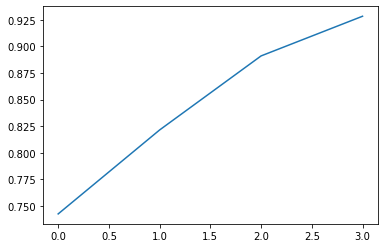

In [27]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(kind='line');

In [36]:
pca = PCA(5)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_pca_train, y_train)

lr.score(X_pca_test, y_test)

0.5048270690786391

## Team Level Analysis

In [38]:
list(df.columns)

['accountId',
 'firstBlood_rate_3',
 'firstTower_rate_3',
 'firstInhibitor_rate_3',
 'win_rate_3',
 'kda_max_3',
 'kda_min_3',
 'kda_avg_3',
 'goldPerMin_max_3',
 'goldPerMin_min_3',
 'goldPerMin_avg_3',
 'dmgPerGold_max_3',
 'dmgPerGold_min_3',
 'dmgPerGold_avg_3',
 'healPerGold_max_3',
 'healPerGold_min_3',
 'healPerGold_avg_3',
 'ccPerMin_max_3',
 'ccPerMin_min_3',
 'ccPerMin_avg_3',
 'dmgTurretPerMin_max_3',
 'dmgTurretPerMin_min_3',
 'dmgTurretPerMin_avg_3',
 'dmgObjPerMin_max_3',
 'dmgObjPerMin_min_3',
 'dmgObjPerMin_avg_3',
 'visionPerMin_max_3',
 'visionPerMin_min_3',
 'visionPerMin_avg_3',
 'champLevelPerMin_max_3',
 'champLevelPerMin_min_3',
 'champLevelPerMin_avg_3',
 'winStreak_3',
 'loseStreak_3',
 'firstBlood_rate_5',
 'firstTower_rate_5',
 'firstInhibitor_rate_5',
 'win_rate_5',
 'kda_max_5',
 'kda_min_5',
 'kda_avg_5',
 'goldPerMin_max_5',
 'goldPerMin_min_5',
 'goldPerMin_avg_5',
 'dmgPerGold_max_5',
 'dmgPerGold_min_5',
 'dmgPerGold_avg_5',
 'healPerGold_max_5',
 'hea

In [58]:
tmp = df.drop(columns=['accountId'])
tmp = pd.get_dummies(tmp, columns= ['teamId'],drop_first=True)
tmp = tmp.apply(pd.to_numeric)

In [59]:
tmp.head()

,firstBlood_rate_3,firstTower_rate_3,firstInhibitor_rate_3,win_rate_3,kda_max_3,kda_min_3,kda_avg_3,goldPerMin_max_3,goldPerMin_min_3,goldPerMin_avg_3,...,visionPerMin_min_10,visionPerMin_avg_10,champLevelPerMin_max_10,champLevelPerMin_min_10,champLevelPerMin_avg_10,winStreak_10,loseStreak_10,gameId,win,teamId_Red
0,0.0,0.0,0.0,0.0,2.500000,2.500000,2.500000,346.386946,346.386946,346.386946,...,0.699301,0.699301,0.466200,0.466200,0.466200,0,-1,3338305642,True,0
1,0.0,0.0,0.0,1.0,2.666667,2.666667,2.666667,495.664336,495.664336,495.664336,...,0.419580,0.419580,0.606061,0.606061,0.606061,1,0,3338305642,True,0
2,0.0,0.0,0.0,1.0,1.600000,1.600000,1.600000,433.864143,433.864143,433.864143,...,0.567929,0.567929,0.567929,0.567929,0.567929,1,0,3338305642,True,0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,214.410480,214.410480,214.410480,...,0.087336,0.087336,0.524017,0.524017,0.524017,0,-1,3338305642,True,0
4,0.0,0.0,0.0,0.0,1.666667,1.500000,1.574074,302.946860,222.051282,272.288129,...,0.628019,0.734288,0.483092,0.406688,0.442393,0,-4,3338305642,True,0


In [71]:
tmp.columns

Index(['firstBlood_rate_3', 'firstTower_rate_3', 'firstInhibitor_rate_3',
       'win_rate_3', 'kda_max_3', 'kda_min_3', 'kda_avg_3', 'goldPerMin_max_3',
       'goldPerMin_min_3', 'goldPerMin_avg_3',
       ...
       'visionPerMin_min_10', 'visionPerMin_avg_10', 'champLevelPerMin_max_10',
       'champLevelPerMin_min_10', 'champLevelPerMin_avg_10', 'winStreak_10',
       'loseStreak_10', 'gameId', 'win', 'teamId_Red'],
      dtype='object', length=102)

In [72]:
drop = ['teamId_Red','gameId','win']
columns = [x for x in list(tmp.columns) if x not in drop]
# columns = ('kda_avg_10','kda_avg_5','kda_avg_3','win_rate_3','win_rate_5','win_rate_10','winStreak_3','winStreak_5','winStreak_10')
print(columns)
d = dict.fromkeys(columns, ['mean', 'min','max'])
team = tmp.groupby(['gameId', 'teamId_Red']).agg(d)
team['win'] = tmp.groupby(['gameId', 'teamId_Red']).agg({'win':"mean"})
data2 = team.reset_index()
data2 = data2.drop(['gameId','teamId_Red'], axis=1)
data2.head(10)

['firstBlood_rate_3', 'firstTower_rate_3', 'firstInhibitor_rate_3', 'win_rate_3', 'kda_max_3', 'kda_min_3', 'kda_avg_3', 'goldPerMin_max_3', 'goldPerMin_min_3', 'goldPerMin_avg_3', 'dmgPerGold_max_3', 'dmgPerGold_min_3', 'dmgPerGold_avg_3', 'healPerGold_max_3', 'healPerGold_min_3', 'healPerGold_avg_3', 'ccPerMin_max_3', 'ccPerMin_min_3', 'ccPerMin_avg_3', 'dmgTurretPerMin_max_3', 'dmgTurretPerMin_min_3', 'dmgTurretPerMin_avg_3', 'dmgObjPerMin_max_3', 'dmgObjPerMin_min_3', 'dmgObjPerMin_avg_3', 'visionPerMin_max_3', 'visionPerMin_min_3', 'visionPerMin_avg_3', 'champLevelPerMin_max_3', 'champLevelPerMin_min_3', 'champLevelPerMin_avg_3', 'winStreak_3', 'loseStreak_3', 'firstBlood_rate_5', 'firstTower_rate_5', 'firstInhibitor_rate_5', 'win_rate_5', 'kda_max_5', 'kda_min_5', 'kda_avg_5', 'goldPerMin_max_5', 'goldPerMin_min_5', 'goldPerMin_avg_5', 'dmgPerGold_max_5', 'dmgPerGold_min_5', 'dmgPerGold_avg_5', 'healPerGold_max_5', 'healPerGold_min_5', 'healPerGold_avg_5', 'ccPerMin_max_5', 'ccPe

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


firstBlood_rate_3                firstTower_rate_3                 \
               mean  min       max              mean  min       max   
0          0.000000  0.0  0.000000          0.000000  0.0  0.000000   
1          0.300000  0.0  1.000000          0.400000  0.0  1.000000   
2          0.133333  0.0  0.666667          0.200000  0.0  0.666667   
3          0.066667  0.0  0.333333          0.200000  0.0  1.000000   
4          0.066667  0.0  0.333333          0.166667  0.0  0.500000   
5          0.000000  0.0  0.000000          0.000000  0.0  0.000000   
6          0.000000  0.0  0.000000          0.300000  0.0  1.000000   
7          0.000000  0.0  0.000000          0.200000  0.0  1.000000   
8          0.066667  0.0  0.333333          0.200000  0.0  1.000000   
9          0.000000  0.0  0.000000          0.100000  0.0  0.500000   

  firstInhibitor_rate_3                win_rate_3  ...  \
                   mean  min       max       mean  ...   
0              0.000000  0.0  0.000000   0.400000  ...   
1              0.600000  0.0  1.000000   0.900000  ...   
2              0.333333  0.0  0.666667   0.600000  ...   
3              0.366667  0.0  1.000000   0.366667  ...   
4              0.000000  0.0  0.000000   0.300000  ...   
5              0.100000  0.0  0.500000   0.600000  ...   
6              0.533333  0.0  1.000000   0.800000  ...   
7              0.333333  0.0  1.000000   0.366667  ...   
8              0.400000  0.0  1.000000   0.800000  ...   
9              0.166667  0.0  0.500000   0.166667  ...   

  champLevelPerMin_avg_10                     winStreak_10          \
                     mean       min       max         mean min max   
0                0.521320  0.442393  0.606061          0.4   0   1   
1                0.585281  0.466172  0.681779          1.0   0   2   
2                0.526089  0.383498  0.603080          1.2   0   4   
3                0.517764  0.444314  0.641106          0.6   0   2   
4                0.498849  0.430261  0.546567          0.4   0   1   
5                0.521209  0.448106  0.625815          0.8   0   2   
6                0.518452  0.494422  0.576482          1.2   1   2   
7                0.518698  0.430416  0.565416          1.2   0   4   
8                0.555933  0.442148  0.651530          1.2   0   3   
9                0.510758  0.420612  0.617898          0.6   0   3   

  loseStreak_10            win  
           mean min max         
0          -1.2  -4   0   True  
1          -0.2  -1   0  False  
2          -0.4  -1   0   True  
3          -0.8  -2   0  False  
4          -1.0  -2   0   True  
5          -0.8  -2   0  False  
6           0.0   0   0   True  
7          -0.6  -1   0  False  
8          -0.4  -2   0   True  
9          -1.2  -2   0  False  

[10 rows x 298 columns]

In [87]:
X = data2.drop(['win'], axis=1)
y = data2.loc[:, "win"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# benchmark models
lr = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(max_depth=2, random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

# 0.5290534208059982
print('Logistic Regression - Train', lr.score(X_train_scaled, y_train))
print('Logistic Regression - Test', lr.score(X_test_scaled, y_test))
print(classification_report(y_test, lr.predict(X_test_scaled)))

# 0.5187441424554826
print('Decision Tree - Train', dt.score(X_train_scaled, y_train))
print('Decision Tree - Test', dt.score(X_test_scaled, y_test))
print(classification_report(y_test, dt.predict(X_test_scaled)))

Logistic Regression - Train 0.6068790397045245
Logistic Regression - Test 0.5014058106841612
              precision    recall  f1-score   support

       False       0.50      0.50      0.50      1064
        True       0.50      0.50      0.50      1070

    accuracy                           0.50      2134
   macro avg       0.50      0.50      0.50      2134
weighted avg       0.50      0.50      0.50      2134

Decision Tree - Train 0.5447830101569714
Decision Tree - Test 0.5014058106841612
              precision    recall  f1-score   support

       False       0.50      0.58      0.54      1064
        True       0.50      0.42      0.46      1070

    accuracy                           0.50      2134
   macro avg       0.50      0.50      0.50      2134
weighted avg       0.50      0.50      0.50      2134



In [90]:
pd.Series(lr.coef_[0], index=X.columns).sort_values()

kda_avg_10               mean   -0.507053
dmgTurretPerMin_avg_5    mean   -0.445213
dmgPerGold_avg_5         mean   -0.339383
kda_max_3                mean   -0.312892
healPerGold_avg_3        mean   -0.299449
                                   ...   
kda_max_10               mean    0.315925
dmgObjPerMin_avg_10      max     0.316123
champLevelPerMin_avg_10  mean    0.335976
dmgTurretPerMin_avg_10   mean    0.383660
kda_avg_5                mean    0.431416
Length: 297, dtype: float64

In [91]:
pd.Series(dt.feature_importances_, index=X.columns).sort_values()

firstBlood_rate_3       mean    0.000000
firstBlood_rate_10      max     0.000000
                        min     0.000000
                        mean    0.000000
loseStreak_5            max     0.000000
                                  ...   
firstBlood_rate_5       mean    0.000000
loseStreak_10           max     0.000000
champLevelPerMin_min_3  max     0.312380
dmgObjPerMin_avg_5      mean    0.342759
visionPerMin_min_10     mean    0.344861
Length: 297, dtype: float64

## PCA

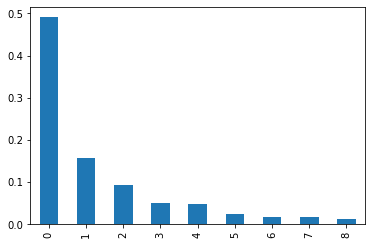

In [239]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

X_pca = pca.fit_transform(X)
pd.Series(pca.explained_variance_ratio_).plot(kind='bar');

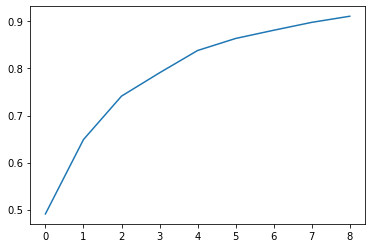

In [100]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(kind='line');

In [240]:
pca = PCA(9)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_pca_train, y_train)

lr.score(X_pca_test, y_test)

0.507029053420806

## KMeans

In [241]:
from sklearn.cluster import KMeans
km = KMeans(2)
clusters = km.fit_predict(X_train)
print(classification_report(y_train,clusters))

              precision    recall  f1-score   support

       False       0.51      0.56      0.53      2169
        True       0.51      0.47      0.49      2163

    accuracy                           0.51      4332
   macro avg       0.51      0.51      0.51      4332
weighted avg       0.51      0.51      0.51      4332



In [242]:
km = KMeans(2)
clusters = km.fit_predict(X_pca_train)
print(classification_report(y_train,clusters))

              precision    recall  f1-score   support

       False       0.49      0.44      0.46      2169
        True       0.49      0.53      0.51      2163

    accuracy                           0.49      4332
   macro avg       0.49      0.49      0.49      4332
weighted avg       0.49      0.49      0.49      4332



In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Gradient Boosting

In [243]:
gb = GradientBoostingClassifier(random_state=42,n_estimators=10)

gb.fit(X_pca_train, y_train)

# 0.5074976569821931
print('Gradient Boosting - Train', gb.score(X_pca_train, y_train))
print('Gradient Boosting - Test', gb.score(X_pca_test, y_test))
print(classification_report(y_test, gb.predict(X_pca_test)))

Gradient Boosting - Train 0.5780240073868883
Gradient Boosting - Test 0.5074976569821931
              precision    recall  f1-score   support

       False       0.51      0.53      0.52      1064
        True       0.51      0.49      0.50      1070

    accuracy                           0.51      2134
   macro avg       0.51      0.51      0.51      2134
weighted avg       0.51      0.51      0.51      2134



{'n_estimators': 10}
              precision    recall  f1-score   support

       False       0.51      0.53      0.52      1064
        True       0.51      0.49      0.50      1070

    accuracy                           0.51      2134
   macro avg       0.51      0.51      0.51      2134
weighted avg       0.51      0.51      0.51      2134



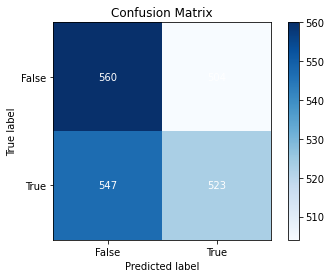

In [103]:
parameters = {
    'n_estimators' : [10, 50, 100, 500, 1000, 5000]
}

gb = GradientBoostingClassifier(random_state=42)

gs = GridSearchCV(gb, parameters, cv=5, scoring='f1', n_jobs=-1)
gs.fit(X_pca_train, y_train)
print(gs.best_params_)
best_model = gs.best_estimator_
y_pred = best_model.predict(X_pca_test)
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

## Random Forest

In [244]:
rf = RandomForestClassifier(n_estimators=100,max_depth=2,min_samples_split=5)
rf.fit(X_pca_train, y_train)

# 0.5159325210871603
print('Random Forest - Train', rf.score(X_pca_train, y_train))
print('Random Forest - Test', rf.score(X_pca_test, y_test))
print(classification_report(y_test, rf.predict(X_pca_test)))

Random Forest - Train 0.5782548476454293
Random Forest - Test 0.5159325210871603
              precision    recall  f1-score   support

       False       0.51      0.59      0.55      1064
        True       0.52      0.44      0.48      1070

    accuracy                           0.52      2134
   macro avg       0.52      0.52      0.51      2134
weighted avg       0.52      0.52      0.51      2134



## Neural Network

In [181]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.regularizers import l1
from keras.optimizers import Adam

In [123]:
X_pca_train.shape

(4332, 9)

In [208]:
X_train.shape

(4332, 297)

In [209]:
X_test.shape

(2134, 297)

In [224]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization(epsilon=0.001))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [225]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),batch_size=32)

Epoch 1/100
136/136 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.4882 - val_loss: 0.6937 - val_accuracy: 0.5019
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.4986 - val_loss: 0.6935 - val_accuracy: 0.5047
Epoch 3/100
136/136 [==============================] - 0s 1ms/step - loss: 0.8334 - accuracy: 0.4970 - val_loss: 0.6935 - val_accuracy: 0.5052
Epoch 4/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.4857 - val_loss: 0.6934 - val_accuracy: 0.5061
Epoch 5/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.5048 - val_loss: 0.6934 - val_accuracy: 0.4963
Epoch 6/100
136/136 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5037
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5047

Epoch 58/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 59/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 60/100
136/136 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 61/100
136/136 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 62/100
136/136 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4977
Epoch 63/100
136/136 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 64/100
136/136 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.5222 - val_loss: 0.6932 - val_accuracy:

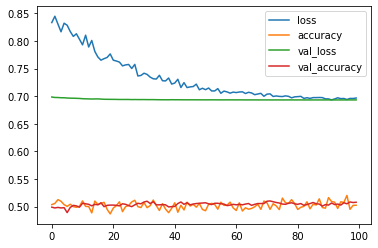

In [213]:
pd.DataFrame(history.history).plot();